<a href="https://colab.research.google.com/github/ingridmidory/TDA-/blob/main/Twocircles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo 1: Persistencia en muestras aleatorias sobre dos circunferencias con ruido

Se importan las bibliotecas necesarias. Para el cálculo de la persistencia la biblioteca es Gudhi. 

In [3]:
!pip install gudhi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 28.7 MB 1.3 MB/s 


In [4]:
import pandas as pd
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import seaborn as sns


Se definen los parámetros para la función 'make_circles' que se usa para generar muestras aleatorias sobre una familia de circunferencias. 'n_samples' es el tamaño de las muestras de cada circunferencia y 'noise' son los factores de varianza de cada muestra. 

In [5]:
n_samples = (200,100)
noise = (0.05,0.05)
factor = 9/10
features, labels = make_circles(n_samples=n_samples, noise=noise, factor=factor)


Se definen los radios y centros de cada circunferencia y se grafica las muestras aleatorias.

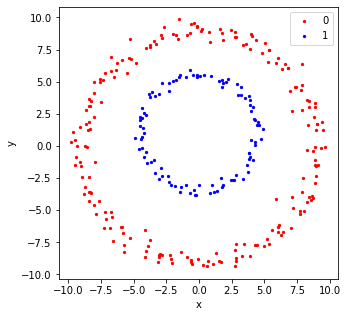

In [6]:
#Radios y centros de los círculos
r1 = 8
(x1,y1)=(0,0)
r2 = 4
(x2,y2)=(0,1)

for i in range(len(features)):
    if labels[i] ==0:
        features[i][0] += x1 + r1*features[i][0]
        features[i][1] += y1+ r1*features[i][1]
    else:
        features[i][0] +=x2+ r2*features[i][0]
        features[i][1] +=y2+ r2*features[i][1]

    
df = pd.DataFrame(dict(x=features[:,0], y=features[:,1], label=labels))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots(figsize=(5, 5))

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', label=key, color=colors[key])
    


Aquí se realiza el cálculo de la persistencia. Primero se genera el complejo de Vietoris-Rips a partir del conjunto de puntos; se puede indicar la máxima distancia a considerar para construir la filtración. A partir del complejo se construye el árbol de simplejos, donde también se puede especificar una máxima dimensión de los complejos simpliciales. La función 'persistence()' calcula la persistencia de la filtración de los complejos simpliciales que podrá ser luego representada en un diagrama de persistencia o de código de barras.

In [7]:
rips_complex_1 = gd.RipsComplex(points=features, max_edge_length = 7)
simplex_tree_1 = rips_complex_1.create_simplex_tree(max_dimension = 2)
diag_1 = simplex_tree_1.persistence()

In [8]:
print("dimensión=",simplex_tree_1.dimension())
print("núm. de simplejos=", simplex_tree_1.num_simplices())
print("núm. de vértices=", simplex_tree_1.num_vertices())
print("2-esqueleto=", simplex_tree_1.get_skeleton(2))


dimensión= 2
núm. de simplejos= 284926
núm. de vértices= 300
2-esqueleto= <generator object at 0x7fa350f7d680>


Se gráfica el diagrama de persistencia correspondiente, así como el código de barras de persistencia.

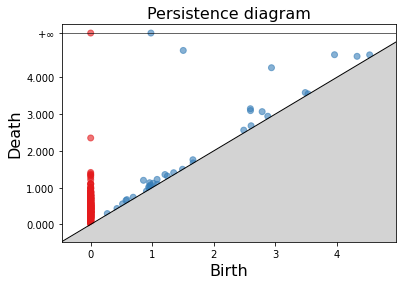

In [9]:
gd.plot_persistence_diagram(diag_1)

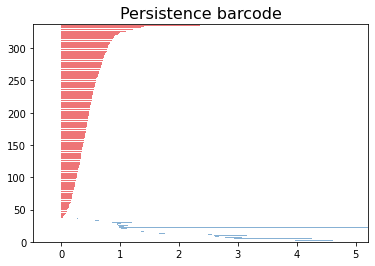

In [10]:
gd.plot_persistence_barcode(diag_1)

También se calculan los diagramas de persistencia para otra tres muestras aleatorias soportadas en dos circunferencias con centros variados.

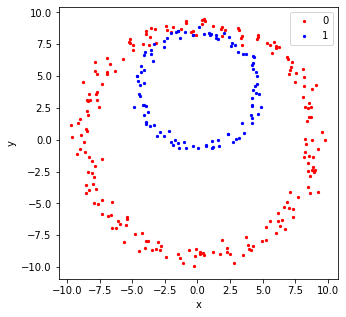

In [11]:
#Tamaño de las muestras y factores de ruido
n_samples = (200,100)
noise = (0.05,0.05)
factor = 9/10
features, labels = make_circles(n_samples=n_samples, noise=noise, factor=factor)

#Radios y centros de los círculos
r1 = 8
(x1,y1)=(0,0)
r2 = 4
(x2,y2)=(0,4)

for i in range(len(features)):
    if labels[i] ==0:
        features[i][0] += x1 + r1*features[i][0]
        features[i][1] += y1+ r1*features[i][1]
    else:
        features[i][0] +=x2+ r2*features[i][0]
        features[i][1] +=y2+ r2*features[i][1]

    
df = pd.DataFrame(dict(x=features[:,0], y=features[:,1], label=labels))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots(figsize=(5, 5))

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', label=key, color=colors[key])
    


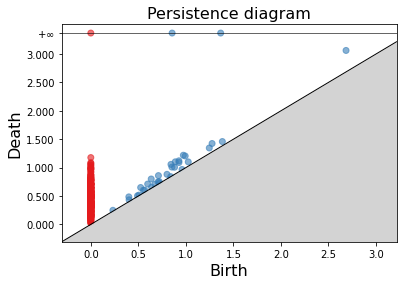

In [12]:
rips_complex_2 = gd.RipsComplex(points=features, max_edge_length = 7)
simplex_tree_2 = rips_complex_2.create_simplex_tree(max_dimension = 2)
diag_2 = simplex_tree_2.persistence()
gd.plot_persistence_diagram(diag_2)

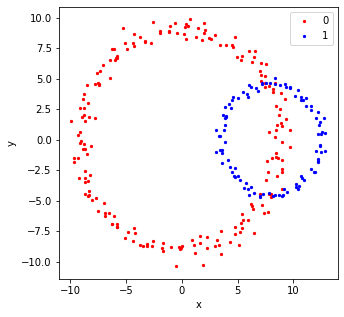

In [13]:
#Tamaño de las muestras y factores de ruido
n_samples = (200,100)
noise = (0.05,0.05)
factor = 9/10
features, labels = make_circles(n_samples=n_samples, noise=noise, factor=factor)

#Radios y centros de los círculos
r1 = 8
(x1,y1)=(0,0)
r2 = 4
(x2,y2)=(8,0)

for i in range(len(features)):
    if labels[i] ==0:
        features[i][0] += x1 + r1*features[i][0]
        features[i][1] += y1+ r1*features[i][1]
    else:
        features[i][0] +=x2+ r2*features[i][0]
        features[i][1] +=y2+ r2*features[i][1]

    
df = pd.DataFrame(dict(x=features[:,0], y=features[:,1], label=labels))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots(figsize=(5, 5))

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', label=key, color=colors[key])
    


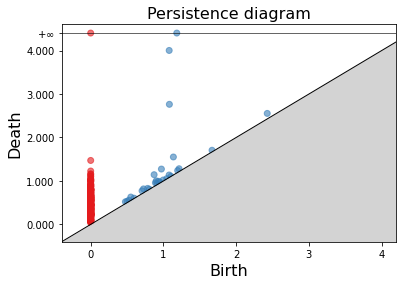

In [14]:
rips_complex_3 = gd.RipsComplex(points=features, max_edge_length = 7)
simplex_tree_3 = rips_complex_3.create_simplex_tree(max_dimension = 2)
diag_3 = simplex_tree_3.persistence()
gd.plot_persistence_diagram(diag_3)

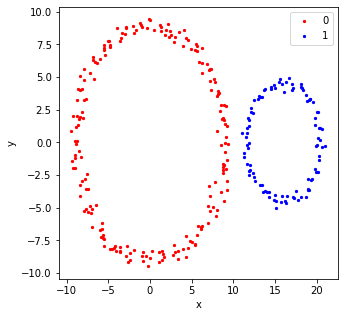

In [15]:
#Tamaño de las muestras y factores de ruido
n_samples = (200,100)
noise = (0.05,0.05)
factor = 9/10
features, labels = make_circles(n_samples=n_samples, noise=noise, factor=factor)

#Radios y centros de los círculos
r1 = 8
(x1,y1)=(0,0)
r2 = 4
(x2,y2)=(16,0)

for i in range(len(features)):
    if labels[i] ==0:
        features[i][0] += x1 + r1*features[i][0]
        features[i][1] += y1+ r1*features[i][1]
    else:
        features[i][0] +=x2+ r2*features[i][0]
        features[i][1] +=y2+ r2*features[i][1]

    
df = pd.DataFrame(dict(x=features[:,0], y=features[:,1], label=labels))
grouped = df.groupby('label')
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots(figsize=(5, 5))

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', marker='.', label=key, color=colors[key])
    


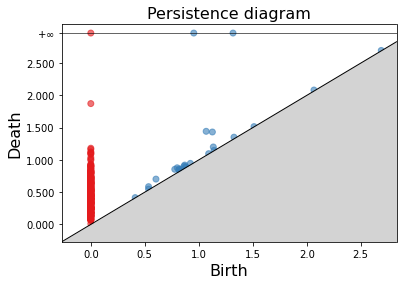

In [16]:
rips_complex_4 = gd.RipsComplex(points=features, max_edge_length = 7)
simplex_tree_4 = rips_complex_4.create_simplex_tree(max_dimension = 2)
diag_4 = simplex_tree_4.persistence()
gd.plot_persistence_diagram(diag_4)

La distancia de cuello de botella (bottleneck) se puede calcular para comparar los diagramas de persistencia obtenidos. Dicha distancia se puede calcular solo para características topológicas de la misma dimensión y tener una mejor idea de la persistencia en distintos ordenes.


In [17]:
interv10 = simplex_tree_1.persistence_intervals_in_dimension(0)
interv20 = simplex_tree_2.persistence_intervals_in_dimension(0)
interv30 = simplex_tree_3.persistence_intervals_in_dimension(0)
interv40 = simplex_tree_4.persistence_intervals_in_dimension(0)
print('Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 2',gd.bottleneck_distance(interv10,interv20))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 3',gd.bottleneck_distance(interv10,interv30))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 4',gd.bottleneck_distance(interv10,interv40))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 3',gd.bottleneck_distance(interv20,interv30))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 4',gd.bottleneck_distance(interv20,interv40))
print('Distancia Bottleneck en dimensión 0 entre los diagramas 3 y 4',gd.bottleneck_distance(interv30,interv40))


Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 2 1.1763952095895647
Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 3 0.881238736749073
Distancia Bottleneck en dimensión 0 entre los diagramas 1 y 4 0.4795671683399745
Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 3 0.29515647284049185
Distancia Bottleneck en dimensión 0 entre los diagramas 2 y 4 0.6968280412495904
Distancia Bottleneck en dimensión 0 entre los diagramas 3 y 4 0.40167156840909857


In [18]:
interv11 = simplex_tree_1.persistence_intervals_in_dimension(1)
interv21 = simplex_tree_2.persistence_intervals_in_dimension(1)
interv31 = simplex_tree_3.persistence_intervals_in_dimension(1)
interv41 = simplex_tree_4.persistence_intervals_in_dimension(1)
print('Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 2',gd.bottleneck_distance(interv11,interv21))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 3',gd.bottleneck_distance(interv11,interv31))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 4',gd.bottleneck_distance(interv11,interv41))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 3',gd.bottleneck_distance(interv21,interv31))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 4',gd.bottleneck_distance(interv21,interv41))
print('Distancia Bottleneck en dimensión 1 entre los diagramas 3 y 4',gd.bottleneck_distance(interv31,interv41))

Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 2 inf
Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 3 0.8404678276552184
Distancia Bottleneck en dimensión 1 entre los diagramas 1 y 4 inf
Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 3 inf
Distancia Bottleneck en dimensión 1 entre los diagramas 2 y 4 0.18879767603177844
Distancia Bottleneck en dimensión 1 entre los diagramas 3 y 4 inf
